In [13]:
#time series analysis using logisitic regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [14]:
df = pd.read_csv("covid19_timeseries.csv")

In [15]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [16]:
df['Recovered Cases'] = df['Recovered Cases'].fillna(0)

In [17]:
df_grouped = df.groupby('Dates')[['Confirmed Cases', 'Death Cases', 'Recovered Cases']].sum().reset_index()

In [18]:
df_grouped['days'] = (df_grouped['Dates'] - df_grouped['Dates'].min()).dt.days

In [19]:
X = df_grouped[['days']]
y = df_grouped['Confirmed Cases']

In [20]:
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

In [21]:
p0 = [max(y)*2, np.median(X['days']), 0.1]
params, _ = curve_fit(logistic, X['days'], y, p0, maxfev=10000)

In [22]:
y_pred = logistic(X['days'], *params)

In [23]:
mse = mean_squared_error(y, y_pred)  # mean squared error
rmse = np.sqrt(mse)  # root mean squared error
r2 = r2_score(y, y_pred)  # R-squared score

In [24]:
accuracy = r2 * 100

In [25]:
print("Logistic Regression RMSE:", rmse)
print("Logistic Regression R² Score:", r2)
print(f"Logistic Regression Accuracy: {accuracy:.2f}%")

Logistic Regression RMSE: 613832.4108617195
Logistic Regression R² Score: 0.9978498644414068
Logistic Regression Accuracy: 99.78%


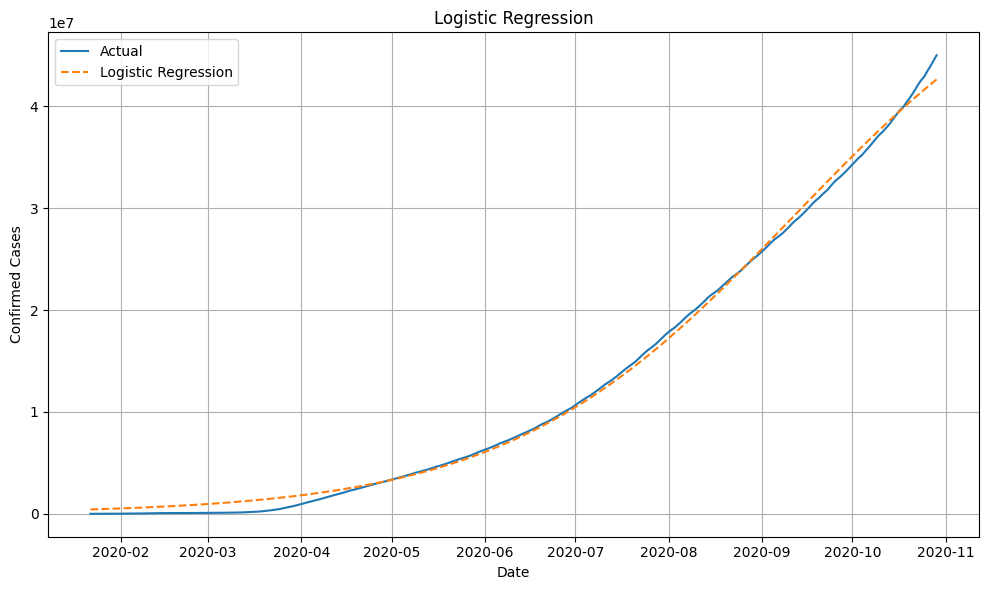

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Dates'], y, label='Actual')
plt.plot(df_grouped['Dates'], y_pred, label='Logistic Regression', linestyle='--')
plt.title('Logistic Regression')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()